In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
#import nltk
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import json
import numpy as np


In [33]:
vocab_size=1000
embedding_dim=16
max_length=16
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"
training_size=20000

In [4]:
with open("sarcasm.json",'r') as f:
    datastore=json.load(f)


In [8]:
sentences=[]
labels=[]
urls=[]
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

29657
mom starting to fear son's web series closest thing she will have to grandchild
[  145   838     2   907  1749  2093   582  4719   221   143    39    46
     2 10736     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [17]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]
# training_labels

In [34]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)
sequences_test=tokenizer.texts_to_sequences(testing_sentences)
padded=pad_sequences(sequences,truncating=trunc_type,padding=padding_type,maxlen=max_length)
testing_padded=pad_sequences(sequences_test,padding=padding_type,truncating=trunc_type,maxlen=max_length)


In [35]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
#   tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs=30
history=model.fit(padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 2s - loss: 0.5296 - acc: 0.7265 - val_loss: 0.4182 - val_acc: 0.8080
Epoch 2/30
20000/20000 - 1s - loss: 0.3838 - acc: 0.8263 - val_loss: 0.4005 - val_acc: 0.8134
Epoch 3/30
20000/20000 - 1s - loss: 0.3661 - acc: 0.8335 - val_loss: 0.4152 - val_acc: 0.8050
Epoch 4/30
20000/20000 - 1s - loss: 0.3600 - acc: 0.8342 - val_loss: 0.4045 - val_acc: 0.8143
Epoch 5/30
20000/20000 - 1s - loss: 0.3573 - acc: 0.8389 - val_loss: 0.4062 - val_acc: 0.8120
Epoch 6/30
20000/20000 - 1s - loss: 0.3553 - acc: 0.8391 - val_loss: 0.4064 - val_acc: 0.8107
Epoch 7/30
20000/20000 - 1s - loss: 0.3554 - acc: 0.8375 - val_loss: 0.4065 - val_acc: 0.8132
Epoch 8/30
20000/20000 - 1s - loss: 0.3536 - acc: 0.8380 - val_loss: 0.4068 - val_acc: 0.8119
Epoch 9/30
20000/20000 - 1s - loss: 0.3523 - acc: 0.8400 - val_loss: 0.4077 - val_acc: 0.8123
Epoch 10/30
20000/20000 - 1s - loss: 0.3521 - acc: 0.8407 - val_loss: 0.4111 - val_acc: 0.8067
Epoch 11/3

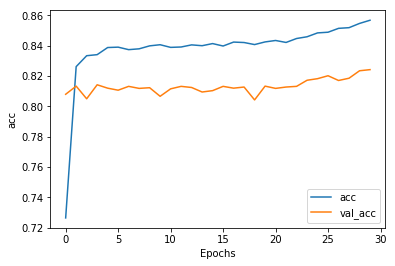

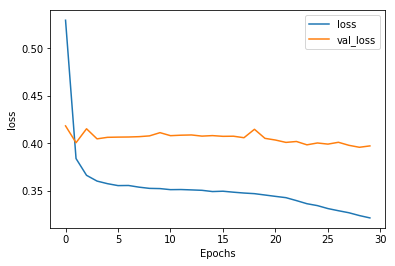

In [37]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
plot_graphs(history,"acc")
plot_graphs(history,"loss")
    
    

In [39]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
#   tf.keras.layers.Flatten(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

W0624 11:29:15.102377 4321379200 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 11:29:15.107621 4321379200 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0624 11:29:15.109215 4321379200 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/py

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 65,793
Trainable params: 65,793
Non-trainable params: 0
_________________________________________________________________


In [40]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
#   tf.keras.layers.Flatten(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16, 128)           41472     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 102,913
Trainable params: 102,913
Non-trainable params: 0
_________________________________________________________________
